<a href="https://colab.research.google.com/github/Khusnul28/KNN-Clustering-Algorithm/blob/main/KNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DATA_ML.xlsx')
df.head()

,Bulan,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,Januari,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM25,1.0
1,Januari,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,2.0
2,Januari,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM25,1.0
3,Januari,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM25,2.0
4,Januari,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM25,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Bulan     1825 non-null   object        
 1   tanggal   1825 non-null   datetime64[ns]
 2   stasiun   1825 non-null   object        
 3   pm10      1757 non-null   float64       
 4   pm25      1725 non-null   float64       
 5   so2       1711 non-null   float64       
 6   co        1789 non-null   float64       
 7   o3        1757 non-null   float64       
 8   no2       1790 non-null   float64       
 9   max       1822 non-null   float64       
 10  critical  1809 non-null   object        
 11  categori  1809 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 171.2+ KB


# Preprocessing Data

In [ ]:
#menghilangkan kolom yang tidak diperlukan
cols_to_drop = ['Bulan', 'tanggal','stasiun','critical']
df = df.drop(cols_to_drop, axis =1)

In [ ]:
df.head()

,pm10,pm25,so2,co,o3,no2,max,categori
0,38.0,53.0,29.0,6.0,31.0,13.0,53.0,1.0
1,27.0,46.0,27.0,7.0,47.0,7.0,47.0,2.0
2,44.0,58.0,25.0,7.0,40.0,13.0,58.0,1.0
3,30.0,48.0,24.0,4.0,32.0,7.0,48.0,2.0
4,38.0,53.0,24.0,6.0,31.0,9.0,53.0,1.0


pm10         68
pm25        100
so2         114
co           36
o3           68
no2          35
max           3
categori     16
dtype: int64

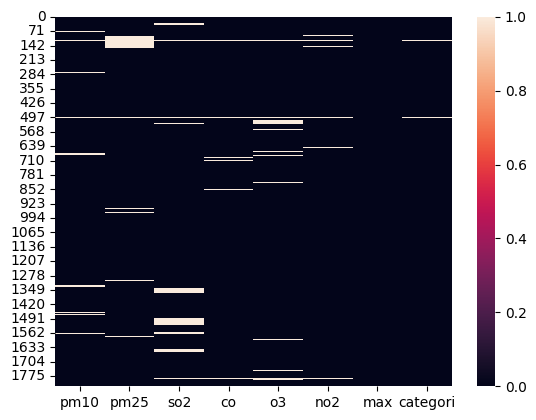

In [ ]:
# Data Hilang

# Mendata Jumlah Missing Value
sb.heatmap (df.isnull())
#mendata data NULL
df.isnull().sum()


In [ ]:
# Menghapus missing value
df=df.dropna()

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
categori    0
dtype: int64

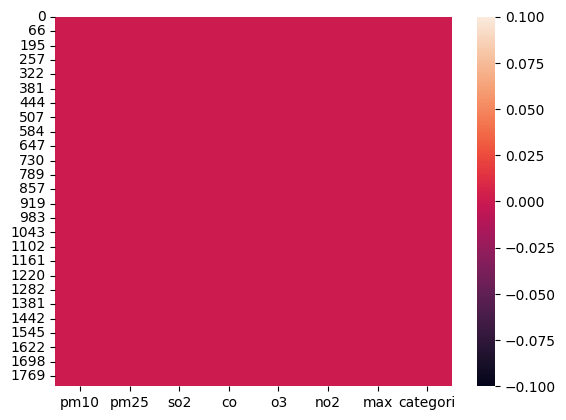

In [ ]:
# Mendata Jumlah Missing Value setelah penghapusan
sb.heatmap (df.isnull())
#mendata data NULL
df.isnull().sum()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      1517 non-null   float64
 1   pm25      1517 non-null   float64
 2   so2       1517 non-null   float64
 3   co        1517 non-null   float64
 4   o3        1517 non-null   float64
 5   no2       1517 non-null   float64
 6   max       1517 non-null   float64
 7   categori  1517 non-null   float64
dtypes: float64(8)
memory usage: 106.7 KB


In [ ]:
columns_to_convert = ['pm10', 'pm25',"so2",'co','o3','no2','max']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      1517 non-null   int64  
 1   pm25      1517 non-null   int64  
 2   so2       1517 non-null   int64  
 3   co        1517 non-null   int64  
 4   o3        1517 non-null   int64  
 5   no2       1517 non-null   int64  
 6   max       1517 non-null   int64  
 7   categori  1517 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 106.7 KB


In [ ]:
df.head()

,pm10,pm25,so2,co,o3,no2,max,categori
0,38,53,29,6,31,13,53,1.0
1,27,46,27,7,47,7,47,2.0
2,44,58,25,7,40,13,58,1.0
3,30,48,24,4,32,7,48,2.0
4,38,53,24,6,31,9,53,1.0


# Membagi Dataset menjadi X dan Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["categori"]=le.fit_transform(df["categori"])

In [ ]:
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pm10      1517 non-null   int64
 1   pm25      1517 non-null   int64
 2   so2       1517 non-null   int64
 3   co        1517 non-null   int64
 4   o3        1517 non-null   int64
 5   no2       1517 non-null   int64
 6   max       1517 non-null   int64
 7   categori  1517 non-null   int64
dtypes: int64(8)
memory usage: 106.7 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#mendefenisikan variabel x dan y
x = df[['pm10','pm25','so2','co','o3','no2','max']]
y = df['categori']

print(x)
print(y)

      pm10  pm25  so2  co  o3  no2  max
0       38    53   29   6  31   13   53
1       27    46   27   7  47    7   47
2       44    58   25   7  40   13   58
3       30    48   24   4  32    7   48
4       38    53   24   6  31    9   53
...    ...   ...  ...  ..  ..  ...  ...
1820    54    76   36  14  21   47   76
1821    44    68   20  11  21   33   68
1822    34    54   28   8  25   29   54
1823    53    75   25  15  23   44   75
1824    60    87   28  19  30   53   87

[1517 rows x 7 columns]
0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1820    1.0
1821    1.0
1822    1.0
1823    1.0
1824    1.0
Name: categori, Length: 1517, dtype: float64


In [ ]:
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
#split dataset
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print (x_train)

      pm10  pm25  so2  co  o3  no2  max
407     55    98   44  12  38   18   98
945     78   104   54  10  63   17  104
319     25    47   22   9  14   17   47
1179    58   105   39  10  28   22  105
1441    72   107   52  14  40   19  107
...    ...   ...  ...  ..  ..  ...  ...
175     31    45   18  10  16   17   45
1596    47    66   49   9  28   11   66
1810    52    73   26   8  28   35   73
60      27    39   25  10  64    8   64
51      46    44   12   9  67   13   67

[1213 rows x 7 columns]


In [ ]:
#normalisasi data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
print (x_train)
x_test = sc_x.transform(x_test)

print ('jumlah data latih:', len(x_train))
print("jumlah data uji:", len(x_test))

[[ 0.93602585  1.86983724  0.3448075  ...  1.32991637  0.25925441
   1.89624282]
 [-1.88784891 -1.57047609 -1.22402783 ... -0.91005764  0.15365481
  -1.66759045]
 [ 0.80155563  0.66572757 -0.75337723 ... -0.84217964  1.84324836
   0.64890118]
 ...
 [ 0.93602585  0.70873149  3.56091994 ...  1.46567237  0.78725239
   0.69344909]
 [ 0.33090983 -2.38755051  0.73701634 ... -0.84217964 -0.47994277
  -0.9548238 ]
 [ 0.39814495  0.40770407  1.0507834  ... -0.57066764 -0.58554236
   0.38161368]]
jumlah data latih: 1213
jumlah data uji: 304


In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split


# Initialize a distance matrix to store distances between points
distance_matrix = np.zeros((len(x_test), len(x_train)))

# Calculate distances and fill the distance matrix
for i in range(len(x_test)):
    for j in range(len(x_train)):
        distance_matrix[i][j] = euclidean(x_test[i], x_train[j])

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Sort the distances and group objects with the smallest distances
sorted_indices = np.argsort(distance_matrix, axis=1)

# Print sorted indices
print("\nSorted Indices:")
print(sorted_indices)

Distance Matrix:
[[2.3658946  1.97665956 5.50903402 ... 4.19640032 4.12380576 4.27195105]
 [2.57667427 4.13199257 4.14283919 ... 3.82388939 4.82559664 5.28323301]
 [1.857025   3.41448283 4.04747058 ... 3.19514176 4.06008478 4.33233214]
 ...
 [2.19582965 4.09797698 3.00124628 ... 1.98506376 3.36795796 2.94437303]
 [3.96516769 5.99769775 1.1489365  ... 3.29443153 2.95508182 3.52013832]
 [0.95860232 3.18770738 3.99416007 ... 2.41139147 4.5459751  4.40074361]]

Sorted Indices:
[[ 263  367  938 ...   10  468 1060]
 [ 910  410  272 ...  840 1060  970]
 [1005  624 1171 ...  840 1060  970]
 ...
 [ 363 1150  274 ...  840 1060  970]
 [ 202  239  749 ...  941 1060  970]
 [1108  900  945 ...  840 1060  970]]


#Pemodelan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the range of k values to test
k_values = range(1, 30)

# Initialize lists to store metrics
metrics_data = []

# Iterate over k values, train models, and compute metrics
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_data.append([k, accuracy, precision, recall, f1])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics_data, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(metrics_df)

     k  Accuracy  Precision    Recall  F1 Score
0    1  0.967105   0.966885  0.967105  0.966932
1    2  0.953947   0.956506  0.953947  0.953943
2    3  0.967105   0.966865  0.967105  0.966726
3    4  0.957237   0.958167  0.957237  0.956314
4    5  0.957237   0.956772  0.957237  0.956619
5    6  0.957237   0.956953  0.957237  0.956920
6    7  0.960526   0.960030  0.960526  0.960017
7    8  0.963816   0.963767  0.963816  0.963757
8    9  0.967105   0.966750  0.967105  0.966837
9   10  0.967105   0.966885  0.967105  0.966932
10  11  0.963816   0.963451  0.963816  0.963495
11  12  0.960526   0.960168  0.960526  0.960090
12  13  0.963816   0.963417  0.963816  0.963017
13  14  0.957237   0.956772  0.957237  0.956619
14  15  0.960526   0.960249  0.960526  0.959816
15  16  0.960526   0.960168  0.960526  0.960090
16  17  0.970395   0.970107  0.970395  0.970039
17  18  0.960526   0.960292  0.960526  0.959820
18  19  0.957237   0.956884  0.957237  0.956116
19  20  0.950658   0.950506  0.950658  0

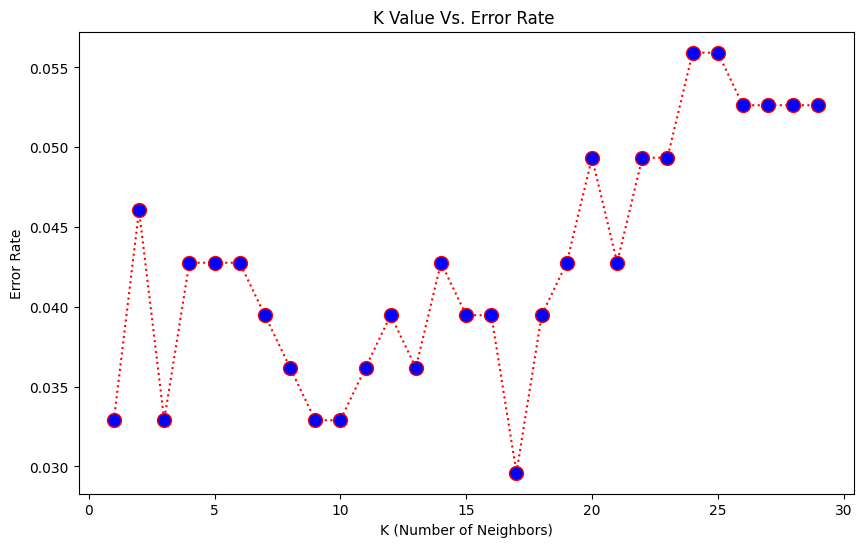

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assume x and y are your features and labels
# Replace this with your actual features (x) and labels (y)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initialize error_rate as an empty list
error_rate = []

# Loop through different values of k
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, color="red", linestyle='dotted', markersize=10, markerfacecolor='blue', marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('K Value Vs. Error Rate ')
plt.show()


In [ ]:
# K NEAREST NEIGHBOUR
#dari fgrafik, k=17
# mendefinisikan model

knn = KNeighborsClassifier(n_neighbors= 17, p=2, metric='euclidean')

In [ ]:
#fitting K-NN ke training
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [ ]:
#hasil prediksi
y_pred=knn.predict(x_test)
y_pred

array([1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 2., 2., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 2., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

# ... (kode sebelumnya)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average=None))
print("Recall:", metrics.recall_score(y_test, y_pred, average=None))
print("F1 score:", metrics.f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy: 0.9703947368421053
Precision: [0.94594595 0.97510373 0.96153846]
Recall: [0.875      0.98739496 0.96153846]
F1 score: [0.90909091 0.98121086 0.96153846]
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        40
         1.0       0.98      0.99      0.98       238
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97       304
   macro avg       0.96      0.94      0.95       304
weighted avg       0.97      0.97      0.97       304



#Evaluasi Model

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        40
         1.0       0.98      0.99      0.98       238
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97       304
   macro avg       0.96      0.94      0.95       304
weighted avg       0.97      0.97      0.97       304

confusion matriks
[[ 35   5   0]
 [  2 235   1]
 [  0   1  25]]


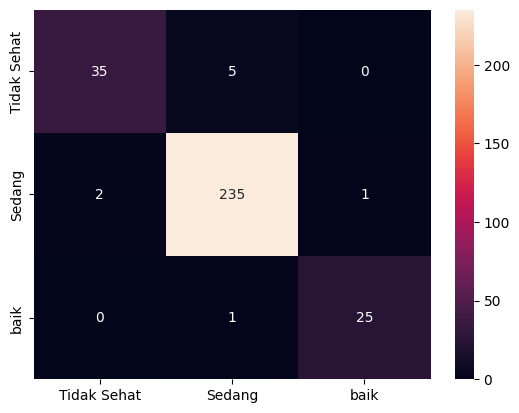

In [ ]:
#evaluate model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#definisikan score
classes_names = ['Tidak Sehat','Sedang','baik']
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=classes_names, index = classes_names)

#seaborns
sns.heatmap(cm, annot = True, fmt ='d');

print(classification_report(y_test,y_pred))
print ('confusion matriks')
print(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred

array([1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 2., 2., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 2., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2.

In [ ]:
y_test

1426    1.0
720     1.0
9       2.0
830     1.0
829     0.0
       ... 
1050    1.0
1684    1.0
1318    1.0
1185    1.0
1600    1.0
Name: categori, Length: 304, dtype: float64

In [ ]:
#nilai akurasi
print('Tingkat akurasi dengan k=17 adalah', accuracy_score(y_test,y_pred))

Tingkat akurasi dengan k=17 adalah 0.9703947368421053


In [ ]:
import numpy as np
X_baru = np.array([[35,50,27,6,31,13,52]])

In [ ]:
import numpy as np
X_baru = np.array([[68,115,38,15,31,14,115]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
new_data_scaled = scaler.transform(X_baru)

NotFittedError: ignored

In [ ]:
sc_x = StandardScaler()
X_baru = sc_x.fit_transform(X_baru)

In [ ]:
knn.predict(X_baru)

array([1.])

In [ ]:
knn.predict([[0,0,0,0,0,0,0]])

array([1])